<a href="https://colab.research.google.com/github/wolfram-roemhild/deep-learning-colab/blob/master/Image_Classification_in_10_Minutes_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification in 10 Minutes with MNIST Dataset
Forked from [Orhan Gazi Yalçın](https://towardsdatascience.com/@oyalcin)

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Image Classification in 10 Minutes with MNIST Dataset, adapted from Orhan Gazi Yalzin

8


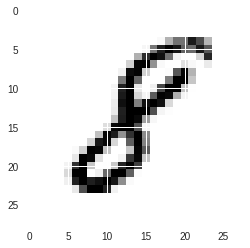

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
i = 7777 # You may select anything up to 60,000
print(y_train[i])
plt.imshow(x_train[i])

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(8,4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 6)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.1955 - acc: 0.9414
Epoch 2/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0672 - acc: 0.9790
Epoch 3/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0496 - acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0412 - acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0350 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0301 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0264 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0251 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0206 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 11s 190us/step - loss: 

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 67us/step


[0.03285218872379373, 0.9908]

6 6


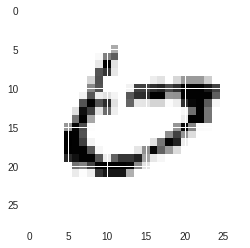

In [0]:
image_index = 445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax(),y_test[image_index])